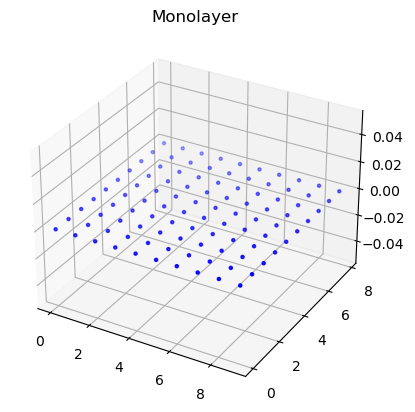

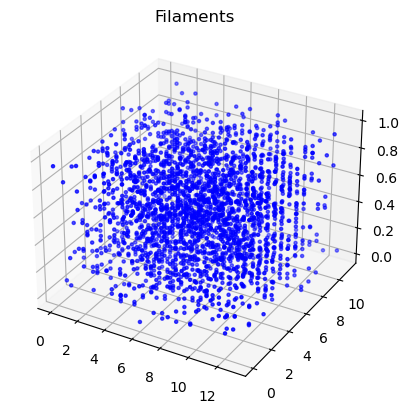

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def monolayer(S, d):
    coordinates = []
    for i in range(S):
        for j in range(S):
            x = i * d
            y = j * d * np.sqrt(3) / 2
            z = 0
            coordinates.append((x, y, z))
    return coordinates

def filaments(S, d, r):
    coordinates = []
    for i in range(S):
        for j in range(S):
            x_base = i * d
            y_base = j * d * np.sqrt(3) / 2
            z_base = 0
            for k in range(r):
                for l in range(r):
                    x = x_base + k * d
                    y = y_base + l * d * np.sqrt(3) / 2
                    z = z_base + np.random.uniform(0, 1)
                    coordinates.append((x, y, z))
    return coordinates

def plot_coordinates(coordinates, title):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(*zip(*coordinates), s=5, c='b', marker='o')
    ax.set_title(title)
    plt.show()


S = 10
d = 1.0
r = 5

monolayer_coordinates = monolayer(S, d)
filaments_coordinates = filaments(S, d, r)

plot_coordinates(monolayer_coordinates, 'Monolayer')
plot_coordinates(filaments_coordinates, 'Filaments')